In [1]:
import agent as myagents
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import numpy as np
from IPython.display import clear_output
import time

### Environment

In [2]:
env_name = "Blackjack-v0" #"FrozenLake8x8-v0"
env = gym.make(env_name)

### Agent

#### Markovian decision process interpretation

In [3]:
if env_name == "FrozenLake8x8-v0":
    num_action = env.action_space.n
    num_state = env.observation_space.n
    state_dim = [env.observation_space.n]
    
elif env_name == "Blackjack-v0":
    num_action = env.action_space.n

    num_state = 1
    state_dim = list()

    for space in env.observation_space.spaces:
        num_state *= space.n
        state_dim.append(space.n)

    print(f"states dimension in 1-D: {int(num_state)}\nstates dimension in 3-D: {state_dim}")

states dimension in 1-D: 704
states dimension in 3-D: [32, 11, 2]


#### Constant Exploration Rate

In [121]:
agent_init = {
    'discount_factor': .999, 
    'learning_rate': 0.2, 
    'exploration_rate_decay': {
        'er': 0.1,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 1e-02,
        'constant_er': True
    },
    'num_action': num_action,
    'num_state': num_state,
}
qla_er_constant = myagents.QLearningAgent(agent_init)

#### Exploration Rate Decay

In [122]:
agent_init = {
    'discount_factor': .999, 
    'learning_rate': 0.2, 
    'exploration_rate_decay': {
        'er': 1,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 1e-02,
        'constant_er': False
    },
    'num_action': num_action,
    'num_state': num_state,
}
qla_er_decay = myagents.QLearningAgent(agent_init)

### Training

In [123]:

n_episode = 20000
t_max_per_episode = 500
verbose = False
graphical = False
agents = {
    'qla_er_decay': qla_er_decay,
    'qla_er_constant': qla_er_constant,
    
}
rewards_per_episode_per_agent = {
    'qla_er_decay': list(),
    'qla_er_constant': list()
    
}
rewards_per_episode_per_agent_array = {
    'qla_er_decay': np.array([]),
    'qla_er_constant': np.array([])
    
}
rewards_per_episode_array = np.array([])

In [124]:
for agent_name, agent in agents.items():

    for i_episode in tqdm(range(n_episode)):

        rewards = 0
        state = env.reset()
        if type(state) is tuple: 
            state = np.ravel_multi_index(state, state_dim)
        next_action = agent.episode_init(state)

        for t in range(t_max_per_episode):

            if graphical:
                clear_output(wait=True)
                env.render()


            state, reward, done, info = env.step(next_action)
            
            if type(state) is tuple: 
                state = np.ravel_multi_index(state, state_dim)
                
            next_action = agent.update(state, reward, done)

            rewards += reward
            if done:
                break

        rewards_per_episode_per_agent[agent_name].append(rewards)
        agent.epsilon.next()

    agent.epsilon.reset_episode_count()
    
env.close()

100%|██████████| 20000/20000 [00:01<00:00, 11451.85it/s]


### Analysis

In [125]:
for array_name, array in rewards_per_episode_per_agent_array.items():
    rewards_per_episode_per_agent_array[array_name] = np.concatenate(
        [rewards_per_episode_per_agent_array[array_name], 
         np.array(rewards_per_episode_per_agent[array_name])]
    )


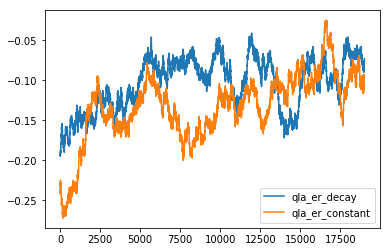

In [126]:
for agent_name, rewards_per_episode_array in rewards_per_episode_per_agent_array.items():
    
    rewards_per_episode_rolling_mean = utils.moving_average(rewards_per_episode_array, n=1000)
    plt.plot(range(len(rewards_per_episode_rolling_mean)), 
             rewards_per_episode_rolling_mean,
            label=agent_name)

plt.legend()

### Testing

In [73]:
sarsa_agent.epsilon = 0.0

In [16]:
for i_episode in range(1):
    
    rewards = 0
    state = env.reset()
    next_action = sarsa_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)  
        state, _, done, _ = env.step(next_action)
        next_action = sarsa_agent.e_greedy(state)
        
        if done:
            break
    
env.close()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
